# Recognizing hand-written digits general ML models

- This notebook we try to classify the MNIST dataset using 6 ML algorithms which we learn in section.
- Algirthms applied on data:<br>
  1- Logisitic Regeression.<br>
  2- Decision Tree.<br>
  3- Random Forest.<br>
  4- Support Vector Machine.<br>
  5- Naive Bayes.<br>
  6- K-Nearesr Neighbor. <br>
  
- we used Confusion Metrics and scikit-learn score for evaluation 
- This done by:<br>

  1- Mohamed Badr Ismail.<br>

  2- Karim Ashoor Mohamed.  

In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import datasets, classifiers and performance metrics
from sklearn.datasets import fetch_openml
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [2]:
# reading our mnist data 
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [3]:
print("shape of X: ", X.shape)
print("shape of y: ", y.shape)

shape of X:  (70000, 784)
shape of y:  (70000,)


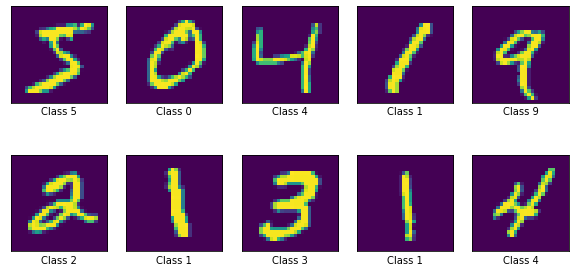

In [4]:
# show some images 
plt.figure(figsize=(10, 5))
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        X[i].reshape(28, 28),
        interpolation="nearest")
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel(f"Class " +  y[i])

In [5]:
# split our data to train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000 , shuffle=True,  random_state=42)

In [6]:
print(X_train.shape)
print(y_train.shape)


print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
# standardize our data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

### Classify using Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_sc, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Score 0.9163
Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       983
           1       0.94      0.97      0.96      1152
           2       0.90      0.89      0.90       967
           3       0.89      0.89      0.89      1034
           4       0.92      0.93      0.92       906
           5       0.88      0.87      0.88       937
           6       0.93      0.95      0.94       961
           7       0.93      0.94      0.93      1055
           8       0.89      0.84      0.87       969
           9       0.91      0.91      0.91      1036

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000




#### evaluate preformance of LR using model score and confusion matrix

In [14]:
score = clf.score(X_test_sc, y_test)
print(f"Logistic Regression Score {score}")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test_sc)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Logistic Regression Score 0.9163
Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       983
           1       0.94      0.97      0.96      1152
           2       0.90      0.89      0.90       967
           3       0.89      0.89      0.89      1034
           4       0.92      0.93      0.92       906
           5       0.88      0.87      0.88       937
           6       0.93      0.95      0.94       961
           7       0.93      0.94      0.93      1055
           8       0.89      0.84      0.87       969
           9       0.91      0.91      0.91      1036

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000




### Classify using SVM

In [15]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_sc, y_train)

SVC()

#### evaluate preformance of SVC using model score and confusion matrix

In [16]:
score = clf.score(X_test_sc, y_test)
print(f"SVM Score {score}")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test_sc)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

SVM Score 0.9631
Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.98      0.99      0.98      1152
           2       0.95      0.96      0.95       967
           3       0.96      0.95      0.95      1034
           4       0.97      0.96      0.96       906
           5       0.97      0.96      0.96       937
           6       0.97      0.98      0.97       961
           7       0.93      0.97      0.95      1055
           8       0.97      0.95      0.96       969
           9       0.97      0.94      0.95      1036

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000




### Classify using Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

#### evaluate preformance of Naive Bayes using model score and confusion matrix

In [22]:
score = clf.score(X_test, y_test)
print(f"Naive Bayes Score {score}")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Naive Bayes Score 0.8301
Classification report for classifier MultinomialNB():
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       983
           1       0.87      0.94      0.91      1152
           2       0.87      0.84      0.85       967
           3       0.79      0.82      0.81      1034
           4       0.83      0.74      0.78       906
           5       0.87      0.68      0.76       937
           6       0.87      0.91      0.89       961
           7       0.95      0.83      0.88      1055
           8       0.67      0.77      0.72       969
           9       0.71      0.84      0.77      1036

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000




### Classify using Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_sc, y_train)

DecisionTreeClassifier()

#### evaluate preformance of Decision Tree using model score and confusion matrix

In [21]:
score = clf.score(X_test_sc, y_test)
print(f"Decision Tree Score {score}")


# Predict the value of the digit on the test subset
predicted = clf.predict(X_test_sc)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Decision Tree Score 0.8715
Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       983
           1       0.95      0.96      0.96      1152
           2       0.83      0.84      0.84       967
           3       0.84      0.84      0.84      1034
           4       0.85      0.86      0.86       906
           5       0.83      0.82      0.83       937
           6       0.90      0.91      0.91       961
           7       0.91      0.92      0.91      1055
           8       0.82      0.79      0.81       969
           9       0.83      0.83      0.83      1036

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000




### Classify using Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_sc, y_train)

RandomForestClassifier()

#### evaluate preformance of Random Forest using model score and confusion matrix

In [23]:
score = clf.score(X_test_sc, y_test)
print(f"Random Forest Score {score}")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test_sc)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Random Forest Score 0.9663
Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.94      0.97      0.96       967
           3       0.96      0.95      0.95      1034
           4       0.96      0.96      0.96       906
           5       0.97      0.96      0.97       937
           6       0.98      0.98      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.95      0.95      0.95       969
           9       0.96      0.95      0.95      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000




### Classify using Nearest Neighbors

In [24]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X_train_sc, y_train)

NearestCentroid()

#### evaluate preformance of Nearest Neighbors using model score and confusion matrix

In [25]:
score = clf.score(X_test_sc, y_test)
print(f"Nearest Neighbors Score {score}")

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test_sc)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Nearest Neighbors Score 0.8057
Classification report for classifier NearestCentroid():
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       983
           1       0.74      0.97      0.84      1152
           2       0.88      0.77      0.82       967
           3       0.76      0.80      0.78      1034
           4       0.83      0.81      0.82       906
           5       0.76      0.69      0.72       937
           6       0.88      0.85      0.86       961
           7       0.92      0.80      0.86      1055
           8       0.76      0.70      0.73       969
           9       0.74      0.81      0.77      1036

    accuracy                           0.81     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.81      0.81     10000


